In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")# message="X does not have valid feature names")

In [2]:
df = pd.read_csv('Crop.csv')

In [3]:
df.head()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23,10.20,116.35,59.96,54.85,21.29,pomegranate
1,170,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,pomegranate
2,158,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,pomegranate
3,133,45,207,6.4,0.94,0.21,8.48,103.10,43.81,68.50,47.29,pomegranate
4,132,48,218,6.7,0.54,0.19,5.59,63.40,56.40,46.71,31.04,pomegranate


In [4]:
df.tail()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
615,41,23,135,5.0,1.67,0.10655,26.0,39.2,206.89,31.09,20.64,potato
616,49,45,90,5.8,1.98,0.09229,19.0,40.2,91.12,32.68,14.91,potato
617,131,24,121,4.9,2.24,0.08775,22.0,40.0,94.34,24.93,23.74,potato
618,131,55,130,5.3,2.48,0.08983,15.0,41.0,92.58,45.73,21.48,potato
619,129,34,160,4.8,1.08,0.08869,25.0,39.0,259.93,33.49,14.16,potato


In [5]:
df.size

7440

In [6]:
df.shape

(620, 12)

In [7]:
df.columns

Index(['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['pomegranate', 'mango', 'grapes', 'mulberry', 'ragi', 'potato'],
      dtype=object)

In [9]:
df.dtypes

N          int64
P          int64
K          int64
ph       float64
EC       float64
S        float64
Cu       float64
Fe       float64
Mn       float64
Zn       float64
B        float64
label     object
dtype: object

In [10]:
df['label'].value_counts()

label
pomegranate    104
mango          104
grapes         104
mulberry       104
ragi           104
potato         100
Name: count, dtype: int64

In [11]:
df_new = df.copy()

df_new.drop('label', axis=1, inplace=True)

<Axes: >

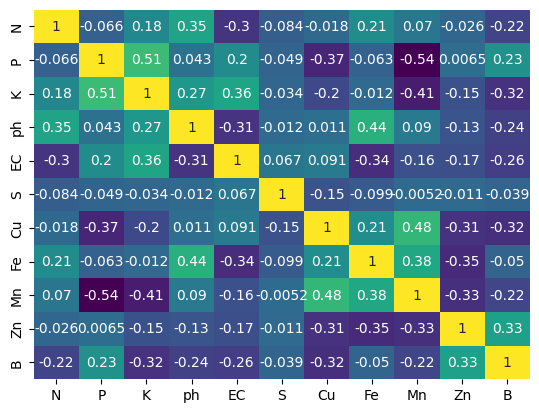

In [12]:
sns.heatmap(df_new.corr(),annot=True, cbar=False, cmap='viridis')

#### Seperating features and target label

In [13]:
features = df[['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B']]
target = df['label']
labels = df['label']

In [14]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [15]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =3)

# Decision Tree

DecisionTrees's Accuracy is:  93.54838709677419
              precision    recall  f1-score   support

      grapes       0.91      1.00      0.95        29
       mango       0.88      0.95      0.91        37
    mulberry       0.92      0.90      0.91        40
 pomegranate       1.00      0.90      0.95        29
      potato       0.96      1.00      0.98        26
        ragi       1.00      0.88      0.94        25

    accuracy                           0.94       186
   macro avg       0.94      0.94      0.94       186
weighted avg       0.94      0.94      0.94       186



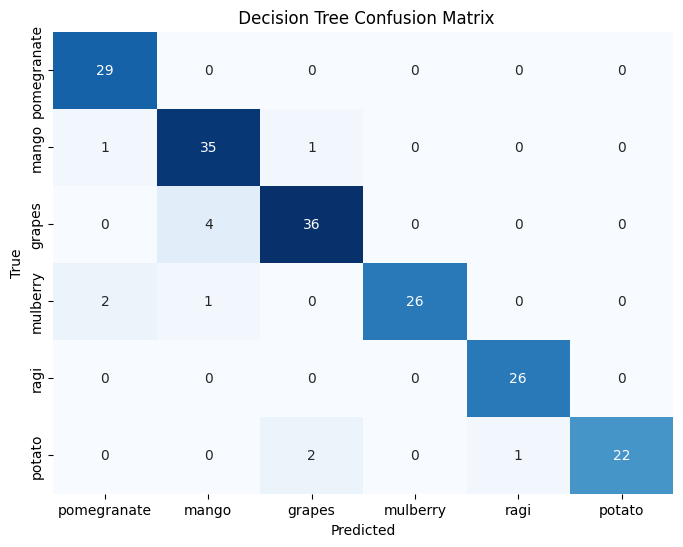

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False, xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title(' Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Guassian Naive Bayes

Naive Bayes's Accuracy is:  0.967741935483871
              precision    recall  f1-score   support

      grapes       0.91      1.00      0.95        29
       mango       0.97      0.95      0.96        37
    mulberry       0.98      1.00      0.99        40
 pomegranate       1.00      0.90      0.95        29
      potato       0.96      1.00      0.98        26
        ragi       1.00      0.96      0.98        25

    accuracy                           0.97       186
   macro avg       0.97      0.97      0.97       186
weighted avg       0.97      0.97      0.97       186



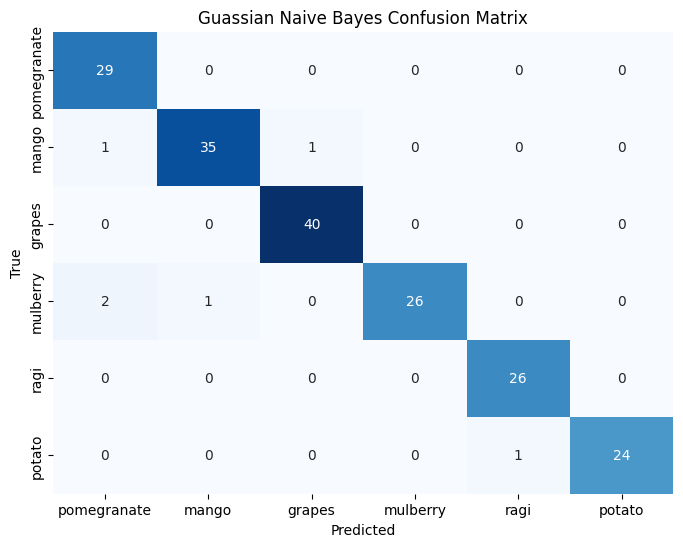

In [17]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Guassian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Support Vector Machine (SVM)

SVM's Accuracy is:  0.9139784946236559
              precision    recall  f1-score   support

      grapes       0.81      1.00      0.89        29
       mango       0.97      0.92      0.94        37
    mulberry       0.90      0.90      0.90        40
 pomegranate       0.93      0.86      0.89        29
      potato       0.96      0.96      0.96        26
        ragi       0.95      0.84      0.89        25

    accuracy                           0.91       186
   macro avg       0.92      0.91      0.91       186
weighted avg       0.92      0.91      0.91       186



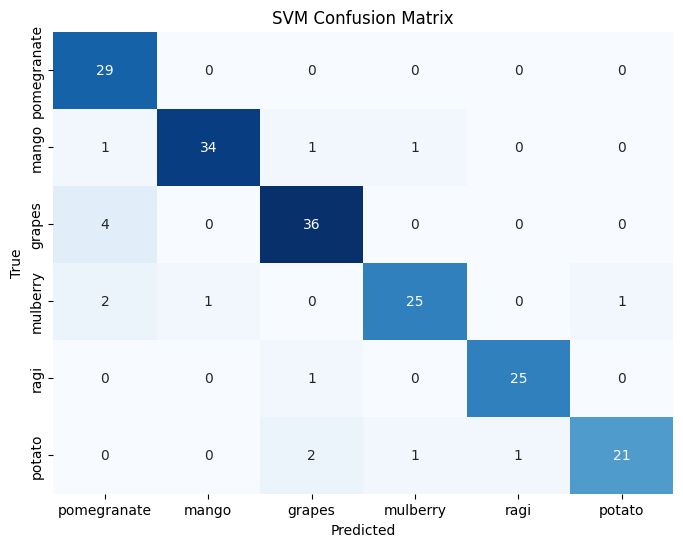

In [18]:
from sklearn.svm import SVC

SVM = SVC(kernel='poly', degree=3, gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False, xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression

Logistic Regression's Accuracy is:  0.956989247311828
              precision    recall  f1-score   support

      grapes       0.91      1.00      0.95        29
       mango       0.97      0.95      0.96        37
    mulberry       0.98      1.00      0.99        40
 pomegranate       1.00      0.83      0.91        29
      potato       0.96      1.00      0.98        26
        ragi       0.92      0.96      0.94        25

    accuracy                           0.96       186
   macro avg       0.96      0.96      0.95       186
weighted avg       0.96      0.96      0.96       186



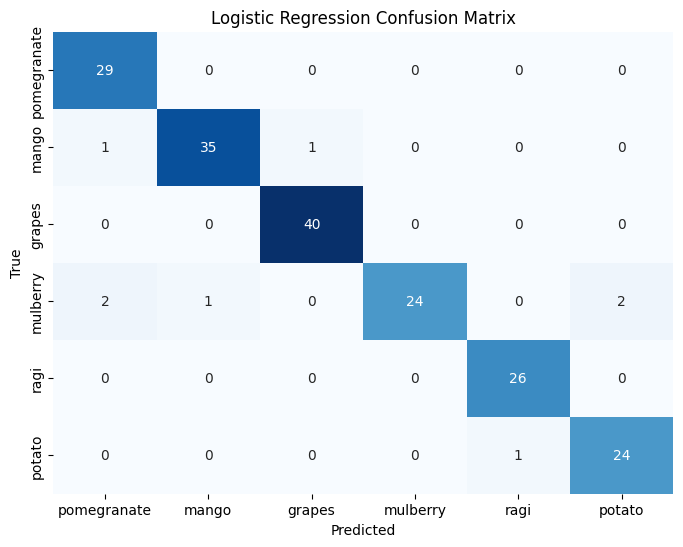

In [19]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False, xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random Forest

RF's Accuracy is:  0.967741935483871
              precision    recall  f1-score   support

      grapes       0.91      1.00      0.95        29
       mango       0.97      0.95      0.96        37
    mulberry       0.98      1.00      0.99        40
 pomegranate       1.00      0.90      0.95        29
      potato       0.96      1.00      0.98        26
        ragi       1.00      0.96      0.98        25

    accuracy                           0.97       186
   macro avg       0.97      0.97      0.97       186
weighted avg       0.97      0.97      0.97       186



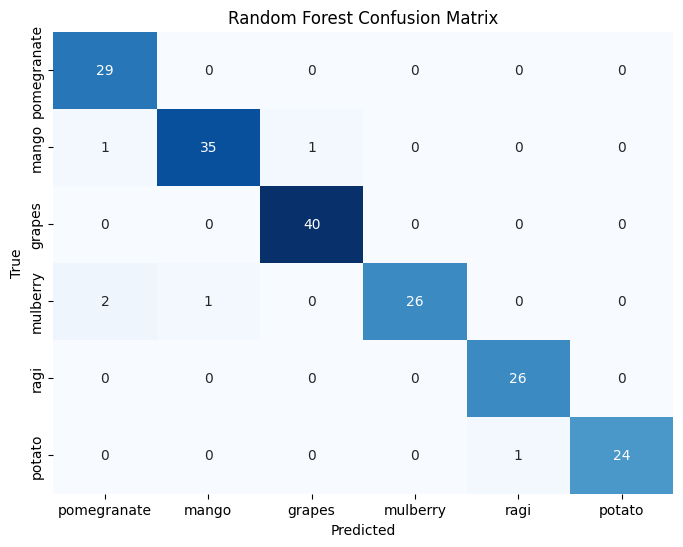

In [20]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

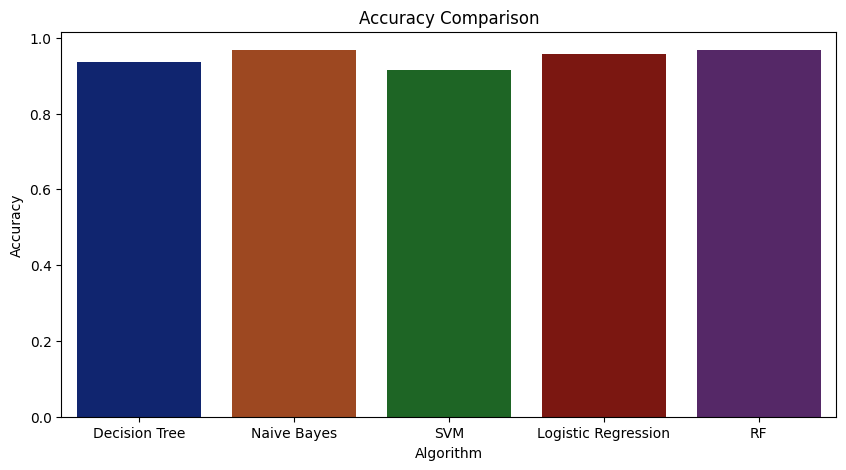

In [21]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc,palette='dark')

In [22]:
accuracy_models = dict(zip(model, acc))

from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Name", "Accuracy"]

for k,v in accuracy_models.items():
    v = round(v, 2)
    table.add_row([k,v])
    
print(table)

+---------------------+----------+
|         Name        | Accuracy |
+---------------------+----------+
|    Decision Tree    |   0.94   |
|     Naive Bayes     |   0.97   |
|         SVM         |   0.91   |
| Logistic Regression |   0.96   |
|          RF         |   0.97   |
+---------------------+----------+


#  Making Predictions

In [23]:
data = np.array([[150,70,217,6,0.6,0.25,10,116,60,55,22]])
prediction = RF.predict(data)
print(prediction)

['pomegranate']


In [24]:
data = np.array([[50,20,130,5,2,0.1,26,40,206,32,20]])
prediction = RF.predict(data)
print(prediction)

['potato']


In [25]:
data = np.array([[150,70,217,6,0.6,0.25,10,116,60,55,22]])
prediction = NaiveBayes.predict(data)
print(prediction)

['pomegranate']


In [26]:
data = np.array([[50,20,130,5,2,0.1,26,40,206,32,20]])
prediction = NaiveBayes.predict(data)
print(prediction)

['potato']


# Crop Recommender

In [27]:
import tkinter as tk
from tkinter import ttk

# Assuming RF is defined and trained in your previous code

def predict_crop():
    # Get values from entry fields
    data = [float(entry.get()) for entry in entry_fields]

    # Make prediction
    prediction = RF.predict([data])

    # Update result label
    result_label.config(text=f'Predicted Crop: {prediction[0]}')

# Create main window
root = tk.Tk()
root.title("Crop Prediction")
root.geometry("500x400")

# Create entry fields for each feature
labels = ['N (Nitrogen)', 'P (Phosphorus)', 'K (Potassium)', 'pH', 'EC (Electrical Conductivity)', 'S (Sulfur)', 
          'Cu (Copper)', 'Fe (Iron)', 'Mn (Manganese)', 'Zn (Zinc)', 'B (Boron)']
entry_fields = []
units = ['ppm', 'ppm', 'ppm', '', 'mS/cm', 'ppm', 'ppm', 'ppm', 'ppm', 'ppm', 'ppm']
for idx, label in enumerate(labels):
    ttk.Label(root, text=f"Enter the value for {label} ({units[idx]}):").grid(row=idx, column=0, padx=10, pady=5, sticky="e")
    entry = ttk.Entry(root)
    entry.grid(row=idx, column=1, padx=10, pady=5, sticky="w")
    entry_fields.append(entry)

# Button to predict
predict_button = ttk.Button(root, text="Predict", command=predict_crop)
predict_button.grid(row=len(labels), column=0, columnspan=2, pady=10)

# Label to display prediction
result_label = ttk.Label(root, text="")
result_label.grid(row=len(labels)+1, column=0, columnspan=2)

root.mainloop()
